In [314]:
import numpy as np
import random
import matplotlib.pyplot as plt
import torch

In [315]:
np.random.seed(42)

In [316]:
yes_xs = [x for x in range(0,3000)]
yes_ys = [(5)*x for x in range(0,3000)]
yes_points = list(zip(yes_xs, yes_ys))
print(yes_points[1])
yes_labels = [1.0 for i in yes_points]

no_xs = [x for x in range(0,3000)]
no_ys = [(1.5)*x for x in range(0,3000)]
no_points = list(zip(no_xs, no_ys))
print(no_points[1])
no_labels = [0.0 for i in no_points]

(1, 5)
(1, 1.5)


In [317]:
xs = np.array(yes_xs + no_xs)
ys = np.array(yes_ys + no_ys)


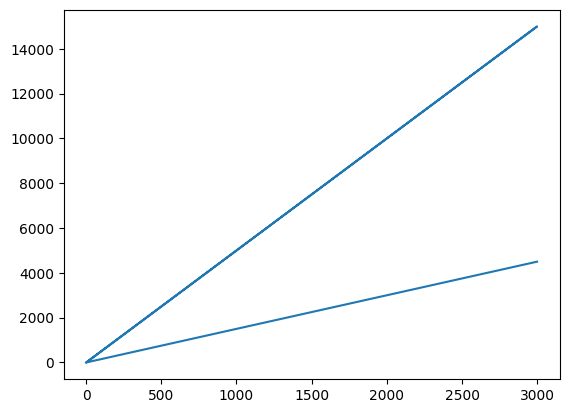

In [318]:
plt.plot(xs,ys)

In [319]:
points = yes_points + no_points

In [320]:
labels = yes_labels + no_labels

In [321]:
data = list(zip(points,labels))
random.shuffle(data)
points, labels = zip(*data)

In [322]:
print(points[0:5])
print(labels[0:5])

((1884, 9420), (1389, 2083.5), (2139, 10695), (751, 3755), (1823, 2734.5))
(1.0, 0.0, 1.0, 1.0, 0.0)


In [323]:
data = torch.tensor(points,dtype=torch.float32)
labels = torch.tensor(labels,dtype=torch.float32)

In [324]:
data.shape

torch.Size([6000, 2])

In [325]:
labels.shape

torch.Size([6000])

In [326]:
w = np.random.randint(-5,5,2)
w = [float(i) for i in w]

In [327]:
w = torch.tensor(w,dtype=torch.float32)
w.requires_grad=True

In [328]:
w.shape

torch.Size([2])

In [329]:
b = torch.tensor(np.random.random(),dtype=torch.float32)
b.requires_grad = True

In [330]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD([w,b], lr=1e-5)

In [331]:
for i in range(0,len(labels)):
    z = torch.matmul(data[i],w) + b
    loss = loss_fn(z,labels[i])
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    


In [332]:
w

tensor([-0.0567,  0.0167], requires_grad=True)

In [333]:
b

tensor(0.9498, requires_grad=True)

In [338]:
with torch.no_grad():  # prevent autograd tracking
    z = torch.matmul(torch.tensor([4.0,20.0]), w) + b
    prob = torch.sigmoid(z)  # convert logit to probability
    print(prob)

tensor(0.7420)
